## Ejercicio de Regresión Lineal
### Mitsiu Alejandro Carreño Sarabia  - E23S-18014 

In [1]:
# Librería para manipulación y análisis de datos
import pandas as pd

# Se crea un diccionario con los datos ground truth
data = {
    "dev_eff":[1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719],
    "nr_crs":[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
    "qa_eff":[5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
}

# Se crea un dataframe para almacenar dichos datos
df = pd.DataFrame(data);

# Se muestra en pantalla el contenido del dataframe
print(df)

    dev_eff  nr_crs  qa_eff
0      1464    2.75     5.3
1      1394    2.50     5.3
2      1357    2.50     5.3
3      1293    2.50     5.3
4      1256    2.50     5.4
5      1254    2.50     5.6
6      1234    2.50     5.5
7      1195    2.25     5.5
8      1159    2.25     5.5
9      1167    2.25     5.6
10     1130    2.00     5.7
11     1075    2.00     5.9
12     1047    2.00     6.0
13      965    1.75     5.9
14      943    1.75     5.8
15      958    1.75     6.1
16      971    1.75     6.2
17      949    1.75     6.1
18      884    1.75     6.1
19      866    1.75     6.1
20      876    1.75     5.9
21      822    1.75     6.2
22      704    1.75     6.2
23      719    1.75     6.1


In [2]:
# Librería para realizar operaciones en vectores
import numpy as np

# Preparar los datos para modelo
# Se separan nuestras variables independientes
#(número de cambios de requisitos y horas efectivas de testing) se cambia la dimension para sklearn
X = df[["nr_crs","qa_eff"]].values.reshape(-1,2)
# Se separa nuestra variable dependiente (horas efectivas de desarrollo)
Y = df["dev_eff"]

# Preparar datos para visualización
# Se separan ambas variables independientes
x = X[:, 0] # nr_crs
y = X[:, 1] # qa_eff
# z tiene nuestra variable dependiente
z = Y

# Se genera un "espacio" del valor mínimo de x1 al valor máximo de x1
# con 30 segmentos
x_pred = np.linspace(1,3,30)
# Se genera un "espacio" del valor mínimo de x2 al valor máximo de x2
# con 30 segmentos
y_pred = np.linspace(5, 7, 30)

# Basado en los espacios de x1 y x2 se genera una red de dos dimensiones
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


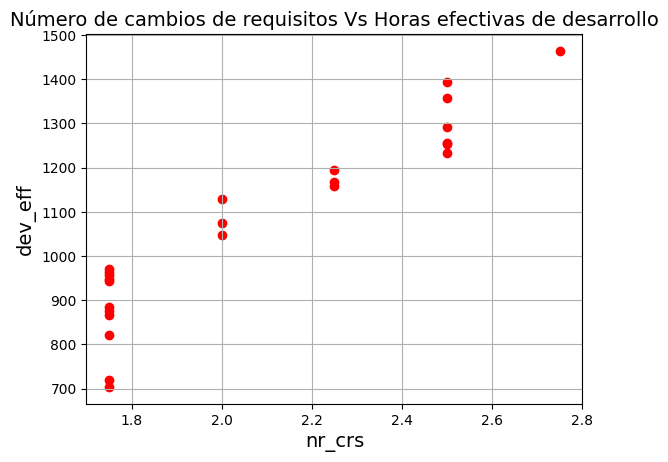

In [3]:
# Se valida la relación lineal entre cada una de las variables independientes
import matplotlib.pyplot as plt

# Se grafíca x1 vs y
plt.scatter(X[:, 0], Y, color='red')
# Se agregan leyendas a la gráfica
plt.title('Número de cambios de requisitos Vs Horas efectivas de desarrollo', fontsize=14)
plt.xlabel('nr_crs', fontsize=14)
plt.ylabel('dev_eff', fontsize=14)
plt.grid(True)
plt.show()

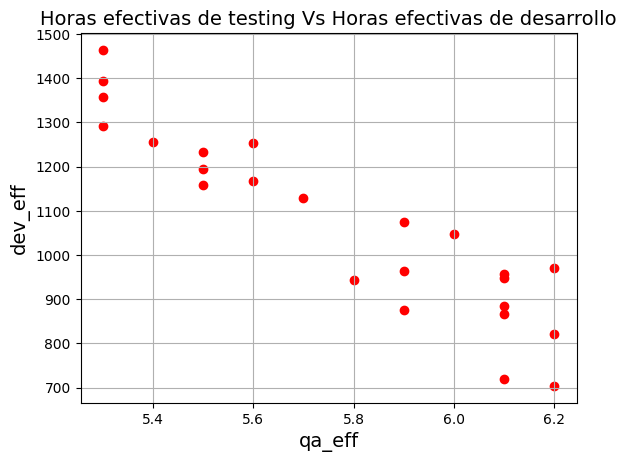

In [4]:
# Se valida la relación lineal entre cada una de las variables independientes

# Se grafica x2 vs y
plt.scatter(X[:, 1], Y, color='red')
# Se agregan leyendas a la gráfica
plt.title('Horas efectivas de testing Vs Horas efectivas de desarrollo', fontsize=14)
plt.xlabel('qa_eff', fontsize=14)
plt.ylabel('dev_eff', fontsize=14)
plt.grid(True)
plt.show()

In [5]:
# Librería con gran variedad de modelos predictivos
from sklearn import linear_model

# Se invoca el constructor del modelo
ols = linear_model.LinearRegression()
# Se ajusta el modelo a los datos de las variables independientes y dependientes
model = ols.fit(X, Y)

# Con el modelo entrenado es posible realizar una predicción que avarque
# el espacio completo a gráficar
predicted = model.predict(model_viz)

In [6]:
# Evaluar modelo (en este caso con los mismos datos de entrenamiento)
print(model.coef_)
print(model.intercept_)

r2 = model.score(X, Y)
r2

[ 345.54008701 -250.14657137]
1798.4039776258546


0.8976335894170216

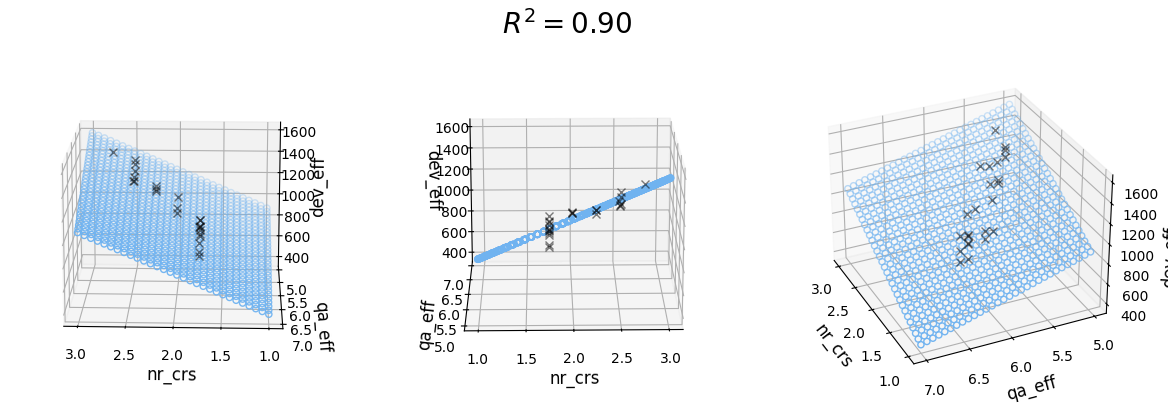

In [7]:
# Gráficar
plt.style.use("default")

# Se define el tamaño de la figura
fig = plt.figure(figsize=(12,4))

# Se definen tres subgráficas todas de tipo 3d
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

# Se agrupan en la variable axes
axes = [ax1, ax2, ax3]

# Para cada subgráfica
for ax in axes:
  # Se gráfica cada uno de los valores ground truth con marcadores "X"
  ax.plot(x, y, z, color="k", zorder=15, linestyle="none", marker="x", alpha=0.5)
  # Se gráfica el plano que avarca el espacio de gráfica completa pero la altitud (eje z) es de acuerdo a la
  # predicción de nuestro modelo
  ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor="#70b3f0")
  # Se agregan leyendas a la gráfica
  ax.set_xlabel("nr_crs", fontsize=12)
  ax.set_ylabel("qa_eff", fontsize=12)
  ax.set_zlabel("dev_eff", fontsize=12)
  # Se indica la cantidad de marcas en eje "x" y "y" (variables independientes)
  ax.locator_params(nbins=5, axis="x")
  ax.locator_params(nbins=5, axis="y")

# Se rota la gráfica para apreciarla desde distintos angulos
ax1.view_init(elev=15, azim=92)
ax2.view_init(elev=17, azim=-91)
ax3.view_init(elev=30, azim=155)

# Se agrega un titulo con el valor precisión de nuestro modelo
fig.suptitle("$R^2 = %.2f$" % r2, fontsize=20)

fig.tight_layout()